[Dogs vs. Cats](https://www.kaggle.com/competitions/dogs-vs-cats/overview)

[Dogs vs. Cats Classification (VGG16 Fine Tuning)](https://www.kaggle.com/code/bulentsiyah/dogs-vs-cats-classification-vgg16-fine-tuning)

# VGG: Very Deep Convolutional Networks

VGG는 이미지 분류와 객체 인식을 위해 개발된 딥러닝 모델로, 2014년 옥스퍼드 대학교의 Visual Geometry Group에서 제안되었습니다. 네트워크의 깊이를 매우 깊게 쌓는 방식으로 설계되어 이미지에서 더 복잡한 특징을 추출할 수 있습니다. 특히 **VGG16**과 **VGG19**가 널리 사용됩니다.

## VGG의 주요 특징

### 1. **작은 3x3 필터의 일관된 사용**
- 모든 컨볼루션 레이어에서 **3x3 크기의 필터**를 사용.
- 작은 필터를 사용하면서도 네트워크의 깊이를 깊게 쌓아 복잡한 특징을 학습.

### 2. **네트워크 깊이**
- **VGG16**은 16개의 가중치 레이어, **VGG19**는 19개의 가중치 레이어로 구성.
- 네트워크가 깊어질수록 더 추상적이고 고차원적인 특징을 학습.

### 3. **필터의 개수 증가**
- 각 컨볼루션 블록마다 필터의 개수를 점차 늘려가며, 깊어질수록 필터 수가 많아짐 (64 → 128 → 256 → 512).

### 4. **맥스 풀링**
- 각 블록 끝에 **2x2 맥스 풀링**을 사용하여 공간적 크기를 축소.
- 중요한 정보를 유지하면서 계산 비용을 줄임.

### 5. **Fully Connected Layer**
- 마지막에 **완전 연결 레이어(fully connected layers)** 를 사용하여 학습된 특징을 바탕으로 분류 수행.
- **4096-4096-1000 노드**로 구성된 완전 연결 레이어와 **소프트맥스** 출력.

## VGG의 구조 (VGG16 예시)

1. **Conv3-64**, **Conv3-64** + MaxPooling
2. **Conv3-128**, **Conv3-128** + MaxPooling
3. **Conv3-256**, **Conv3-256**, **Conv3-256** + MaxPooling
4. **Conv3-512**, **Conv3-512**, **Conv3-512** + MaxPooling
5. **Conv3-512**, **Conv3-512**, **Conv3-512** + MaxPooling
6. Fully Connected Layer (4096-4096-1000) + Softmax Output

## VGG의 학습 과정

1. **입력 이미지**: (예: 224x224x3 크기의 RGB 이미지)
2. **컨볼루션 레이어**: 3x3 필터를 적용해 각 패치에서 특징을 추출.
3. **맥스 풀링 레이어**: 특징 맵의 크기를 줄여 계산 효율성 향상.
4. **완전 연결 레이어**: 추출된 특징을 바탕으로 클래스 분류 수행.

## VGG의 장점과 단점

### **장점**
- **간단한 구조**: 3x3 필터와 2x2 풀링을 일관되게 사용해 구조가 단순.
- **성능**: 매우 깊은 네트워크로 높은 성능을 보임.
- **전이 학습**: 사전 훈련된 가중치를 이용해 다양한 문제에 적용 가능.

### **단점**
- **많은 파라미터 수**: 1억 개 이상의 파라미터로 인해 학습 및 계산 자원이 많이 필요.
- **메모리 및 계산 비용**: 깊고 넓은 구조로 인해 메모리 요구량과 계산 시간이 많이 소요됨.
- **실시간 성능 제한**: 실시간 애플리케이션에 적합하지 않을 수 있음.

## 결론
VGG는 이미지 분류, 전이 학습 등 다양한 분야에서 강력한 성능을 발휘하는 모델로, 그 단순한 구조 덕분에 많은 연구 및 실용적인 애플리케이션에 널리 사용됩니다.

# Import Library

In [1]:
import os
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# Prepare Training Data

In [2]:
filenames = os.listdir("./input/train")
categories = []
for filename in filenames:
    category = filename.split(".")[0]
    if category == "dog":
        categories.append("1")
    else:
        categories.append("0")

df = pd.DataFrame({"filename": filenames, "category": categories})
df.head(), df.tail()

(       filename category
 0     cat.0.jpg        0
 1     cat.1.jpg        0
 2    cat.10.jpg        0
 3   cat.100.jpg        0
 4  cat.1000.jpg        0,
            filename category
 24995  dog.9995.jpg        1
 24996  dog.9996.jpg        1
 24997  dog.9997.jpg        1
 24998  dog.9998.jpg        1
 24999  dog.9999.jpg        1)

## See Total In count

<Axes: >

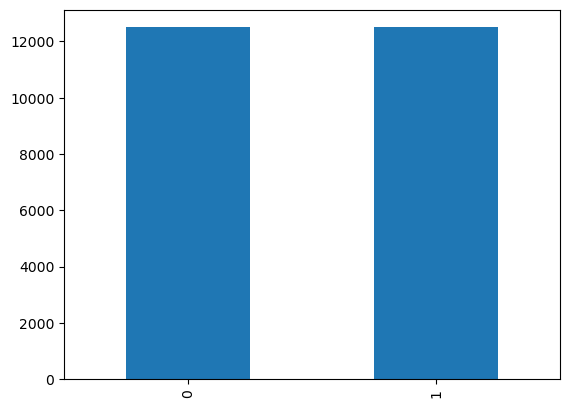

In [3]:
df["category"].value_counts().plot.bar()

# See sample image

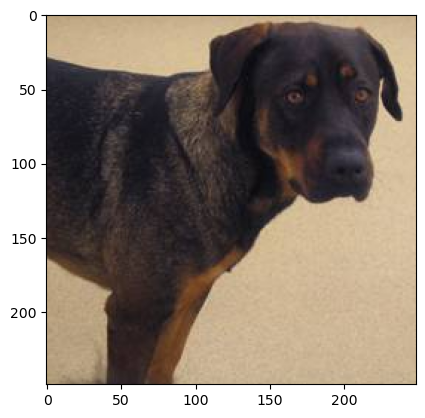

In [4]:
sample = random.choice(filenames)
image = load_img(f"./input/train/{sample}")
plt.imshow(image)

# Build Model

In [5]:
from keras import applications, layers, optimizers
from keras.applications import VGG16
from keras.layers import (
    Activation,
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    GlobalMaxPooling2D,
    MaxPool2D,
)
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator

In [6]:
image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 5
batch_size = 16

- (224, 224, 3) 행렬을 입력으로 받음
- 4096-4096-1000의 fc layer를 제외
- ImageNet 데이터셋으로 사전학습된 가중치 사용

In [7]:
pre_trained_model = VGG16(
    input_shape=input_shape, include_top=False, weights="imagenet"
)
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

마지막 3 개의 convolutional layer를 제외하고는 가중치 업데이트하지 않음

In [8]:
# 마지막에 추가할
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True

In [9]:
last_layer = pre_trained_model.get_layer("block5_pool")
last_output = last_layer.output
last_output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

## binary_crossentropy
- 이진 부류 문제에서 자주 사용되는 손실 함수
- 모델의 예측 값(0~1 사이 확률 값)과 실제 레이블(0, 1) 사이 차이 계산
- 클래스가 두 개 이상일 때는 categorical_crossentropy 사용

## SGD
- 전체 데이터셋 사용 대신 배치 또는 단일 샘플 사용해 기울기 계산하고 가중치 업데이트
- 훨씬 빠르게 업데이트할 수 있지만, 매번 기울기 계산이 불안정할 수 있음. 이 불안정성은 학습을 빠르게 하거나 로컬 미니마를 벗어나는 데 도움이 될 수 있음.

In [10]:
# Flatten the output layer to 1d
# 각 채널(512개)에 대해 최댓값만 추출하여 1d 벡터로 변환. (7, 7)에서 가장 큰 값 하나만 남김
# (7, 7, 512) -> (512,)
x = GlobalMaxPooling2D()(last_output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation="relu")(x)

# Add a dropout rate of 0.5
x = Dropout(0.5)(x)

x = layers.Dense(1, activation="sigmoid")(x)

model = Model(pre_trained_model.input, x)
model.compile(
    loss="binary_crossentropy",
    # 사전 학습된 모델에서 일부 층 미세 조정하는 작업이므로 작읍 학습률 설정
    # 모멘텀을 설정해 이전 기울기의 관성 반영. 학습이 더 부드럽고, 빠르게 수렴 가능
    optimizer=optimizers.SGD(learning_rate=1e-4, momentum=0.9),
    metrics=["accuracy"],
)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# Prepare Test and Train Data

In [11]:
train_df, validate_df = train_test_split(df, test_size=0.1)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

# Training Generator

- ImageDataGenerator를 이용해 이미지 데이터 증강(Data Augmentation)을 적용
- flow_from_dataframe을 이용해 데이터프레임으로부터 이미지 파일과 레이블 불러와 모델에 배치 단위로 제공

In [16]:
train_datagen = ImageDataGenerator(
    # 최대 15도까지 무작위 회전
    rotation_range=15,
    # 픽셀 값을 0~1로 정규화. 원본 이미지 픽셀 값이 0~255이므로 1/255 적용
    rescale=1.0 / 255,
    # 최대 0.2의 전단 변환(shear transformation, 이미지를 한쪽 방향으로 밀어냄) 적용
    shear_range=0.2,
    # 최대 20% 확대/축소
    zoom_range=0.2,
    # 수평으로 뒤집기
    horizontal_flip=True,
    # 변환 후 생긴 빈 공간 처리 방법 정의. nearest는 가장 가까운 픽셀 값 이용해 채움
    fill_mode="nearest",
    # 이미지를 가로 및 세로 최대 10%까지 이동
    width_shift_range=0.1,
    height_shift_range=0.1,
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "./input/train/",
    x_col="filename",
    y_col="category",
    class_mode="binary",
    target_size=(image_size, image_size),
    batch_size=batch_size,
)

Found 22500 validated image filenames belonging to 2 classes.


# Validation Generator

In [85]:
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "./input/train/",
    x_col="filename",
    y_col="category",
    class_mode="binary",
    target_size=(image_size, image_size),
    batch_size=batch_size,
    shuffle=False,
)

Found 2500 validated image filenames belonging to 2 classes.


# See sample generated images

Found 1 validated image filenames.


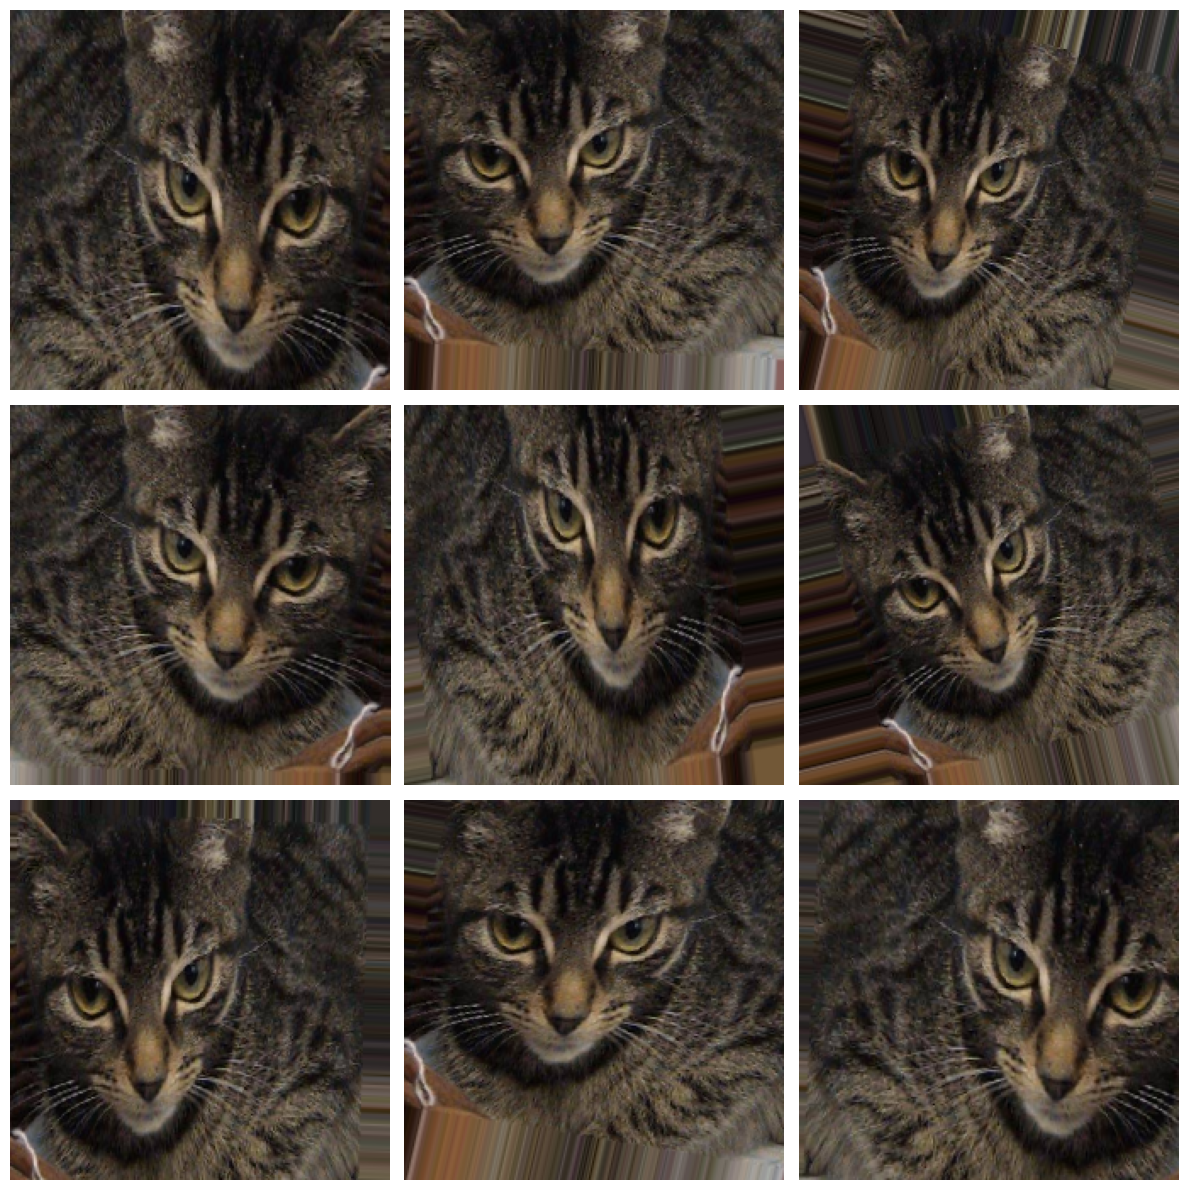

In [29]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "./input/train/",
    x_col="filename",
    y_col=None,
    class_mode=None,
    target_size=(image_size, image_size),
    batch_size=1,
)

plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    image = next(example_generator)[0]
    plt.imshow(image)
    plt.axis("off")

plt.tight_layout()
plt.show()

# Fit Model

In [32]:
# fine-tune the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate // batch_size,
    steps_per_epoch=total_train // batch_size,
)

Epoch 1/5
1406/1406 [==============================] - 307s 218ms/step - loss: 0.2992 - accuracy: 0.8603 - val_loss: 0.1252 - val_accuracy: 0.9515
Epoch 2/5
1406/1406 [==============================] - 188s 133ms/step - loss: 0.1510 - accuracy: 0.9369 - val_loss: 0.1022 - val_accuracy: 0.9615
Epoch 3/5
1406/1406 [==============================] - 189s 134ms/step - loss: 0.1272 - accuracy: 0.9477 - val_loss: 0.1207 - val_accuracy: 0.9503
Epoch 4/5
1406/1406 [==============================] - 187s 133ms/step - loss: 0.1104 - accuracy: 0.9551 - val_loss: 0.0887 - val_accuracy: 0.9683
Epoch 5/5
1406/1406 [==============================] - 191s 136ms/step - loss: 0.1025 - accuracy: 0.9582 - val_loss: 0.0973 - val_accuracy: 0.9663


In [49]:
model.save("./model")

INFO:tensorflow:Assets written to: ./model\assets


INFO:tensorflow:Assets written to: ./model\assets


In [37]:
loss, accuracy = model.evaluate(
    validation_generator, steps=total_validate // batch_size, workers=12
)
print(f"Test: accuracy = {accuracy}; loss = {loss}%")

156/156 [==============================] - 9s 54ms/step - loss: 0.0972 - accuracy: 0.9663
Test: accuracy = 0.9663461446762085; loss = 0.0971737951040268%


In [40]:
history.history

{'loss': [0.2992255985736847,
  0.15103907883167267,
  0.12722627818584442,
  0.11041233688592911,
  0.10253061354160309],
 'accuracy': [0.8602561950683594,
  0.9369329214096069,
  0.9476961493492126,
  0.9551236629486084,
  0.9581924676895142],
 'val_loss': [0.12517721951007843,
  0.10216426849365234,
  0.12066866457462311,
  0.08872902393341064,
  0.09730552136898041],
 'val_accuracy': [0.9515224099159241,
  0.9615384340286255,
  0.9503205418586731,
  0.9683493375778198,
  0.9663461446762085]}

In [42]:
np.arange(1, 10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

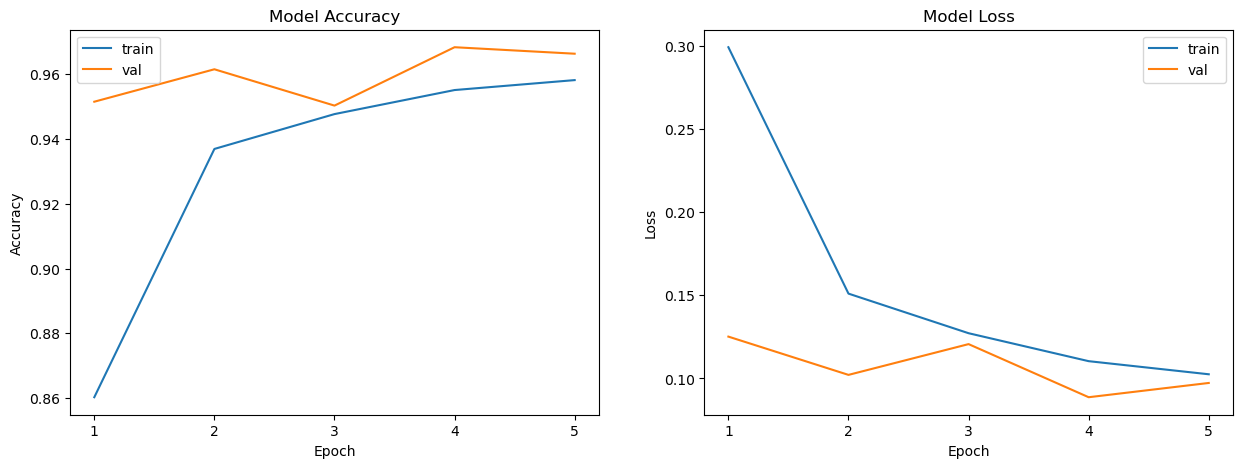

In [43]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(
        range(1, len(model_history.history["accuracy"]) + 1),
        model_history.history["accuracy"],
    )
    axs[0].plot(
        range(1, len(model_history.history["val_accuracy"]) + 1),
        model_history.history["val_accuracy"],
    )
    axs[0].set_title("Model Accuracy")
    axs[0].set_xlabel("Epoch")
    axs[0].set_ylabel("Accuracy")
    axs[0].set_xticks(
        np.arange(1, len(model_history.history["accuracy"]) + 1),
    )
    axs[0].legend(["train", "val"], loc="best")

    axs[1].plot(
        range(1, len(model_history.history["loss"]) + 1), model_history.history["loss"]
    )
    axs[1].plot(
        range(1, len(model_history.history["val_loss"]) + 1),
        model_history.history["val_loss"],
    )
    axs[1].set_title("Model Loss")
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Loss")
    axs[1].set_xticks(
        np.arange(1, len(model_history.history["loss"]) + 1),
    )
    axs[1].legend(["train", "val"], loc="best")

    plt.show()


plot_model_history(history)

In [86]:
Y_val = validate_df["category"]
y_pred = model.predict(validation_generator)

157/157 [==============================] - 7s 47ms/step


In [87]:
threshold = 0.5
y_final = np.where(y_pred > threshold, "1", "0")
y_final.size, y_final

(2500,
 array([['0'],
        ['0'],
        ['0'],
        ...,
        ['0'],
        ['0'],
        ['0']], dtype='<U1'))

Text(0.5, 1.0, 'Confusion Matrix')

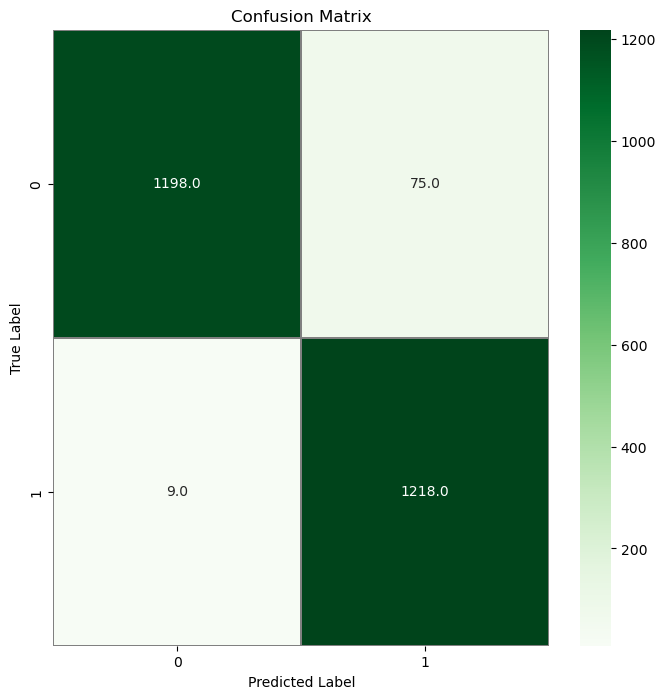

In [88]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(Y_val, y_final)

f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(
    confusion_mtx,
    annot=True,
    linewidths=0.01,
    cmap="Greens",
    linecolor="gray",
    fmt=".1f",
    ax=ax,
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

In [89]:
from sklearn.metrics import classification_report

report = classification_report(Y_val, y_final, target_names=["0", "1"])

print(report)

              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1273
           1       0.94      0.99      0.97      1227

    accuracy                           0.97      2500
   macro avg       0.97      0.97      0.97      2500
weighted avg       0.97      0.97      0.97      2500



# Prepare Testing Data

In [60]:
test_filenames = os.listdir("./input/test1")
test_df = pd.DataFrame({"filename": test_filenames})
nb_samples = test_df.shape[0]

# Create Testing Generator

In [61]:
test_gen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    "./input/test1/",
    x_col="filename",
    y_col=None,
    class_mode=None,
    batch_size=batch_size,
    target_size=(image_size, image_size),
    shuffle=False,
)

Found 12500 validated image filenames.


# Predict

In [62]:
predict = model.predict(test_generator, steps=np.ceil(nb_samples / batch_size))
threshold = 0.5
test_df["category"] = np.where(predict > threshold, 1, 0)

782/782 [==============================] - 70s 90ms/step


# See predicted result

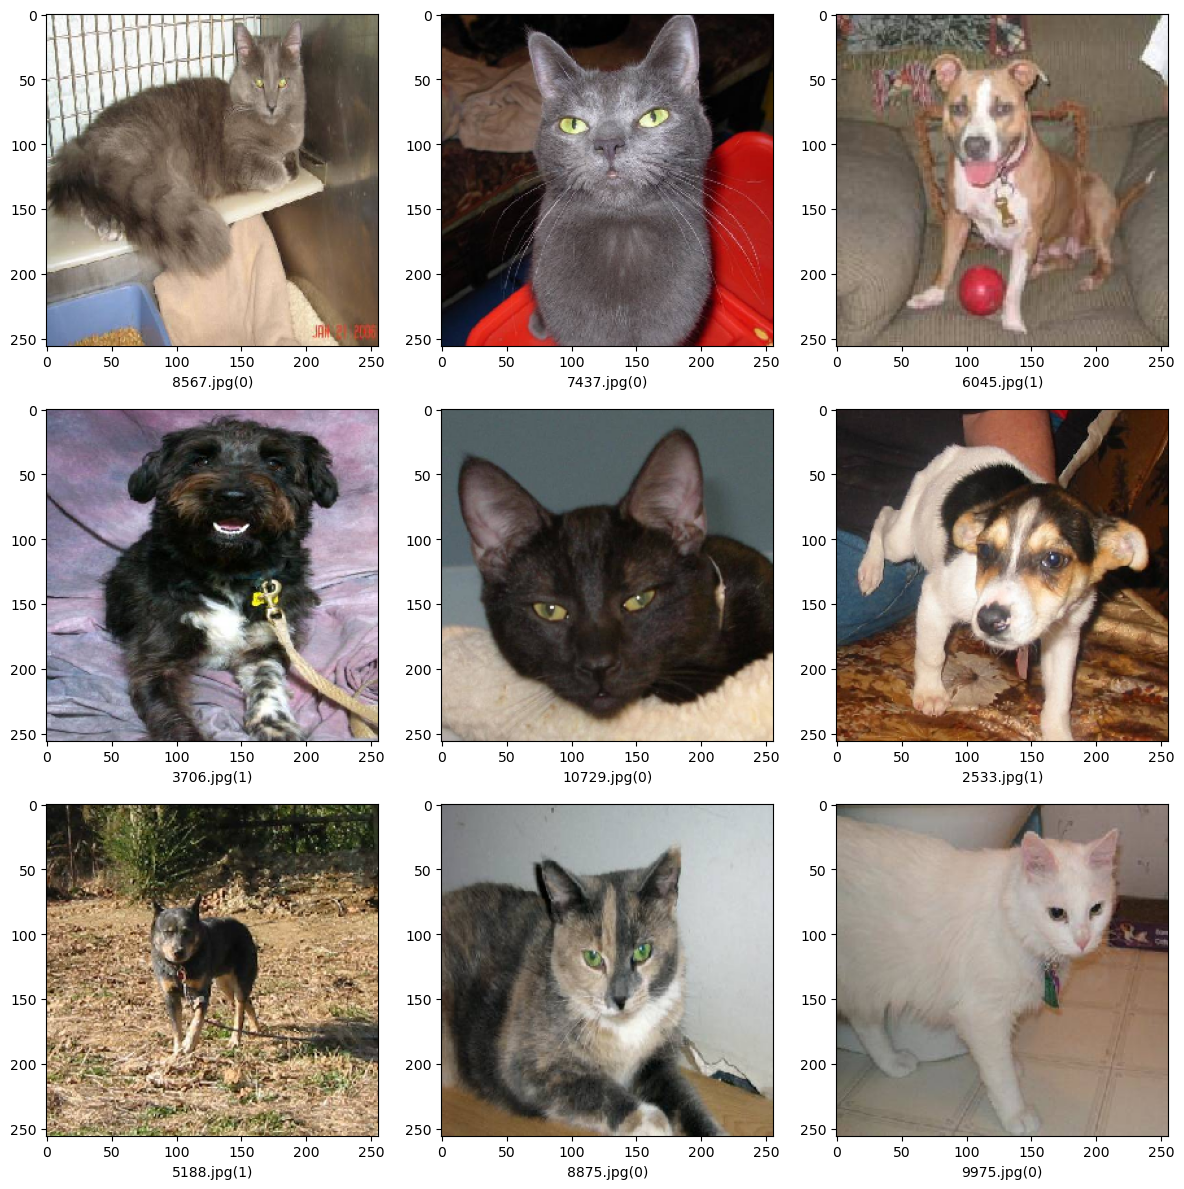

In [63]:
sample_test = test_df.sample(n=9).reset_index()
plt.figure(figsize=(12, 12))
for index, row in sample_test.iterrows():
    filename = row["filename"]
    category = row["category"]
    img = load_img(f"./input/test1/{filename}", target_size=(256, 256))
    plt.subplot(3, 3, index + 1)
    plt.imshow(img)
    plt.xlabel(f"{filename}({category})")

plt.tight_layout()
plt.show()

# Submission

In [64]:
submission_df = test_df.copy()
submission_df["id"] = submission_df["filename"].str.split(".").str[0]
submission_df["label"] = submission_df["category"]
submission_df = submission_df[["id", "label"]]
submission_df.to_csv("submission.csv", index=False)

Text(0.5, 1.0, '(Test data)')

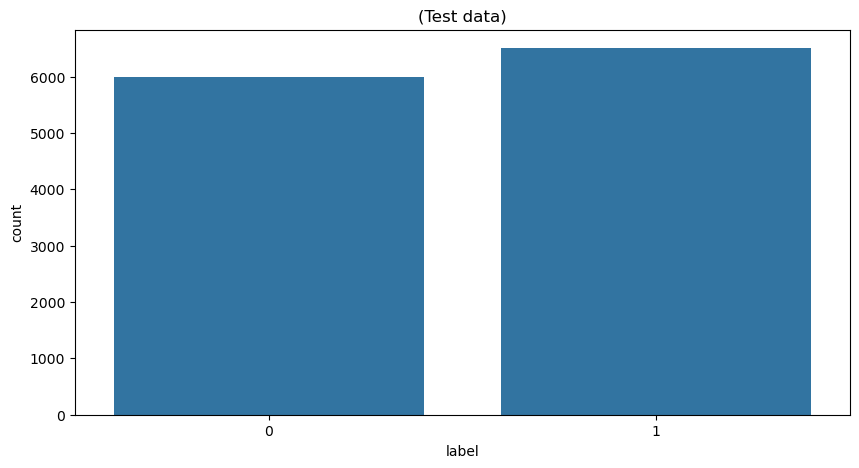

In [68]:
plt.figure(figsize=(10, 5))
sns.countplot(submission_df, x="label")
plt.title("(Test data)")